In [1]:
import pandas as pd

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас (подвох что заголовки - первые 2 линии)
df = pd.read_csv('default_of_credit_card_clients.csv',header= 1,sep = ';')

In [3]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [5]:
df[['AGE','PAY_AMT2']].describe(percentiles=[0.20,0.70])

,AGE,PAY_AMT2
count,30000.000000,3.000000e+04
mean,35.485500,5.921163e+03
std,9.217904,2.304087e+04
min,21.000000,0.000000e+00
20%,27.000000,2.688000e+02
50%,34.000000,2.009000e+03
70%,40.000000,4.045300e+03
max,79.000000,1.684259e+06


In [6]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
df[(df['SEX'] == 2) & (df['EDUCATION'] == 2)].count()

ID                            8656
LIMIT_BAL                     8656
SEX                           8656
EDUCATION                     8656
MARRIAGE                      8656
AGE                           8656
PAY_0                         8656
PAY_2                         8656
PAY_3                         8656
PAY_4                         8656
PAY_5                         8656
PAY_6                         8656
BILL_AMT1                     8656
BILL_AMT2                     8656
BILL_AMT3                     8656
BILL_AMT4                     8656
BILL_AMT5                     8656
BILL_AMT6                     8656
PAY_AMT1                      8656
PAY_AMT2                      8656
PAY_AMT3                      8656
PAY_AMT4                      8656
PAY_AMT5                      8656
PAY_AMT6                      8656
default payment next month    8656
dtype: int64

In [7]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей
#  начинающихся на BILL_ и PAY_
df.groupby('default payment next month').median().loc[:,list(df.columns.map(lambda s: 'BILL_' in s or 'PAY_' in s))]

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1.0,0.0,0.0,0.0,0.0,0.0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [8]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table('SEX', 'EDUCATION', 'MARRIAGE')

MARRIAGE,0,1,2,3
EDUCATION,,,,
0,NaN,1.500000,1.400000,NaN
1,1.750000,1.545943,1.613306,1.400000
2,1.833333,1.653610,1.581197,1.611111
3,1.727273,1.633695,1.531692,1.650485
4,NaN,1.653846,1.661765,1.666667
5,NaN,1.680000,1.637795,1.666667
6,NaN,1.500000,1.476190,2.000000


In [9]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
df['Factor'] = 'A'
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
df['Factor'][(df['LIMIT_BAL']<=100000) & (df['LIMIT_BAL']> 10000)] = 'B'
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
df['Factor'][(df['LIMIT_BAL']<=200000) & (df['LIMIT_BAL']> 100000)] = 'C'
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
df['Factor'][(df['LIMIT_BAL']<=400000) & (df['LIMIT_BAL']> 200000)] = 'D'
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
df['Factor'][(df['LIMIT_BAL']<=700000) & (df['LIMIT_BAL']> 400000)] = 'E'
# принимает значение F, если значение LIMIT_BAL >700000
df['Factor'][df['LIMIT_BAL']> 700000] = 'F'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is t

In [11]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Factor
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,B
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,C
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,B
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,B
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,B
5,6,50000,1,1,2,37,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,B
6,7,500000,1,1,2,29,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,E
7,8,100000,2,2,2,23,0,-1,-1,0,...,-159,567,380,601,0,581,1687,1542,0,B
8,9,140000,2,3,1,28,0,0,2,0,...,11793,3719,3329,0,432,1000,1000,1000,0,C
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13007,13912,0,0,0,13007,1122,0,0,B


In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

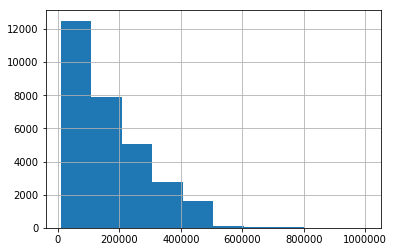

In [13]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)
df['LIMIT_BAL'].hist()

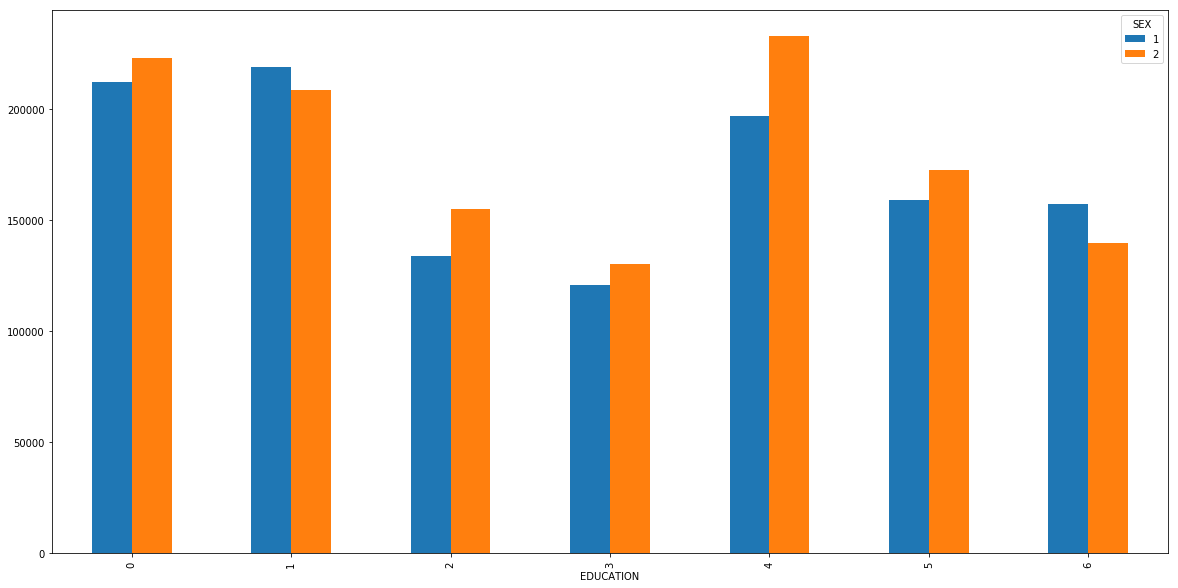

In [14]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
fig, ax = plt.subplots(figsize=(20,10))
df.pivot_table('LIMIT_BAL','EDUCATION', 'SEX').plot(kind = 'bar',stacked = False, ax=ax)

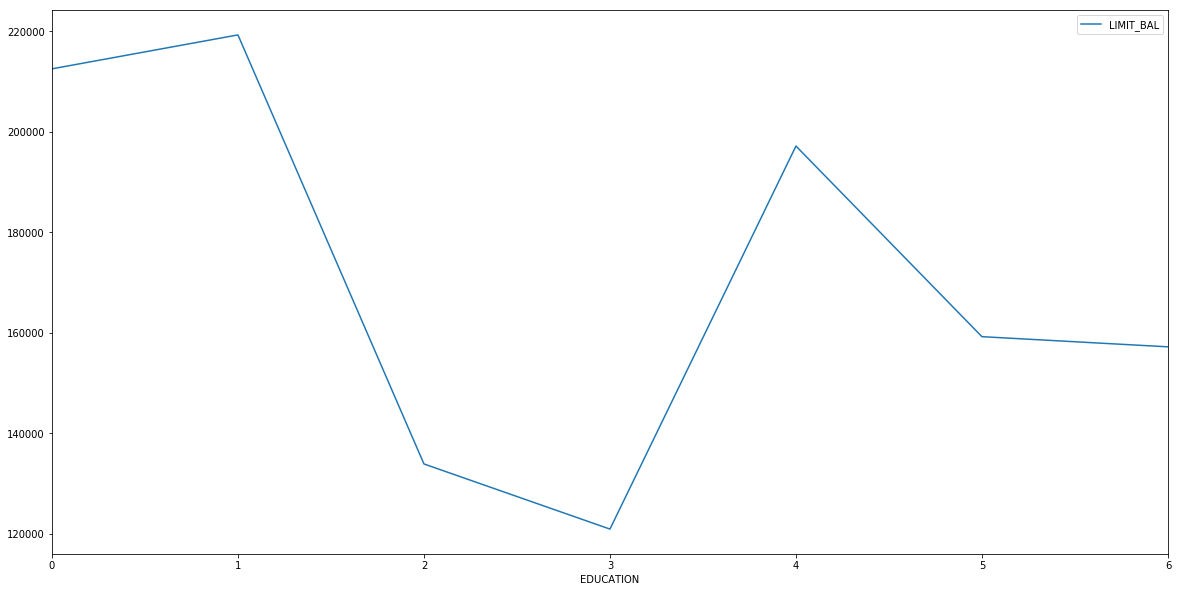

In [15]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
fig, ax = plt.subplots(figsize=(20,10))
df[df['SEX'] == 1].pivot_table('LIMIT_BAL','EDUCATION').plot(ax=ax)

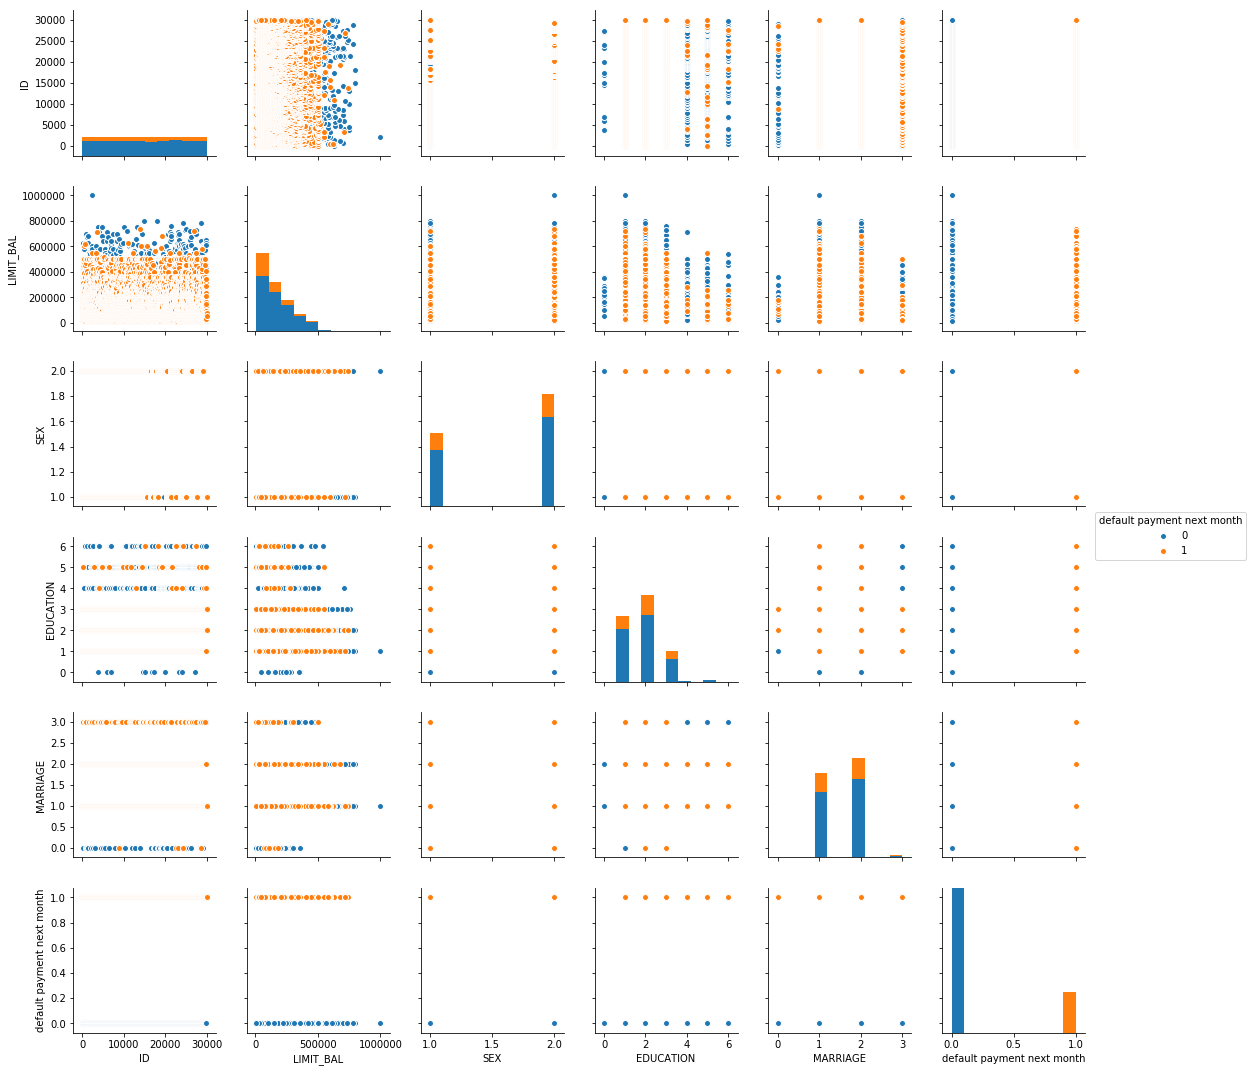

In [38]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех 
     # возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sb

df1 = df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE','default payment next month']]
df2 = df[['AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4','default payment next month']]
df3 = df[['PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3','default payment next month']]
df4 = df[['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2','default payment next month']]
df5 = df[['PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default payment next month']]

sb.pairplot(df1, hue='default payment next month')

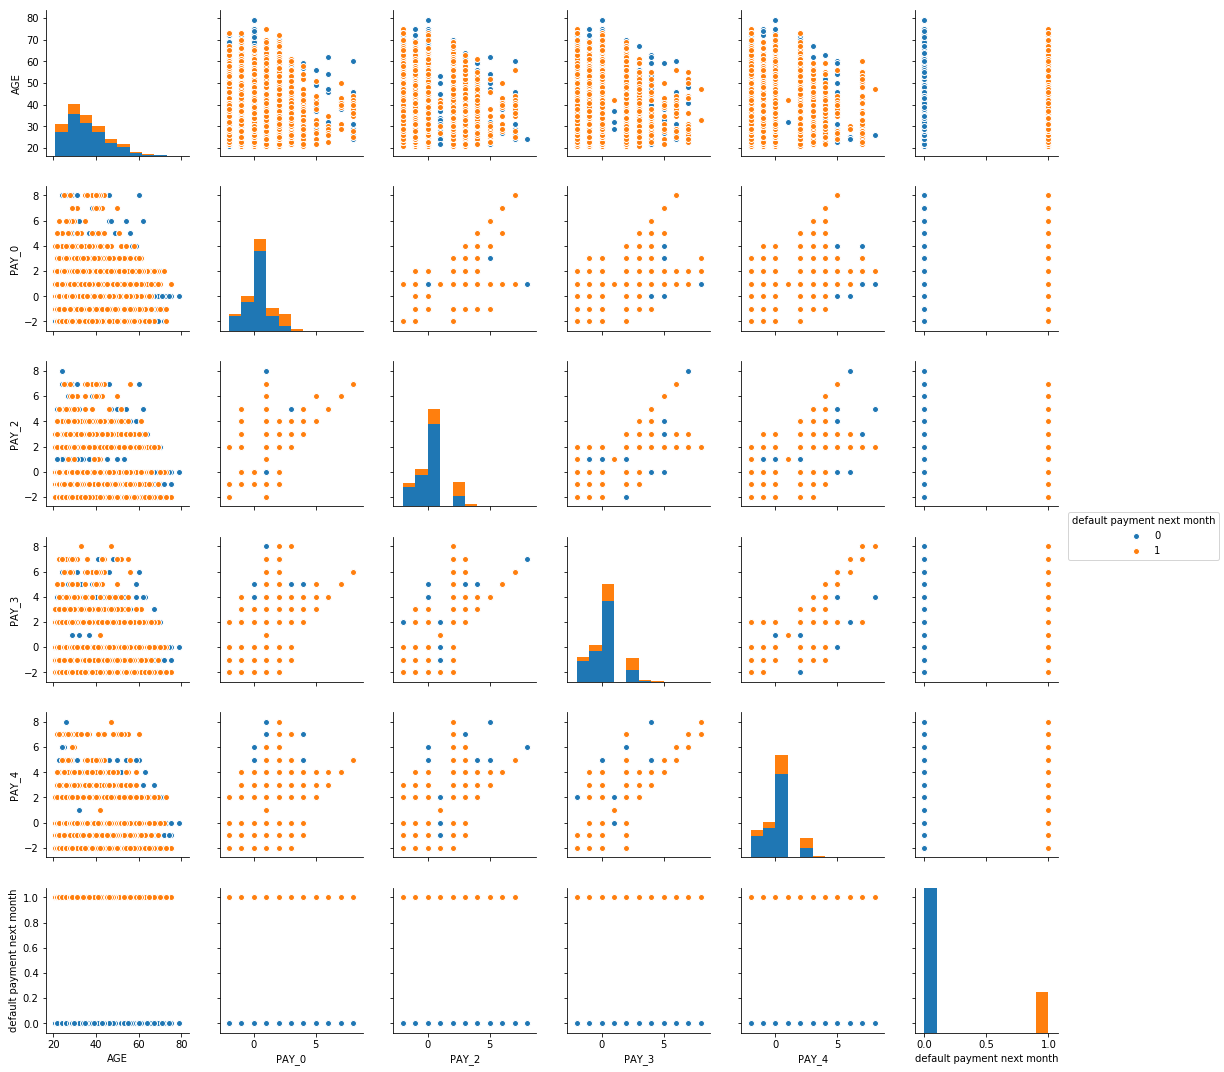

In [39]:
sb.pairplot(df2, hue='default payment next month')

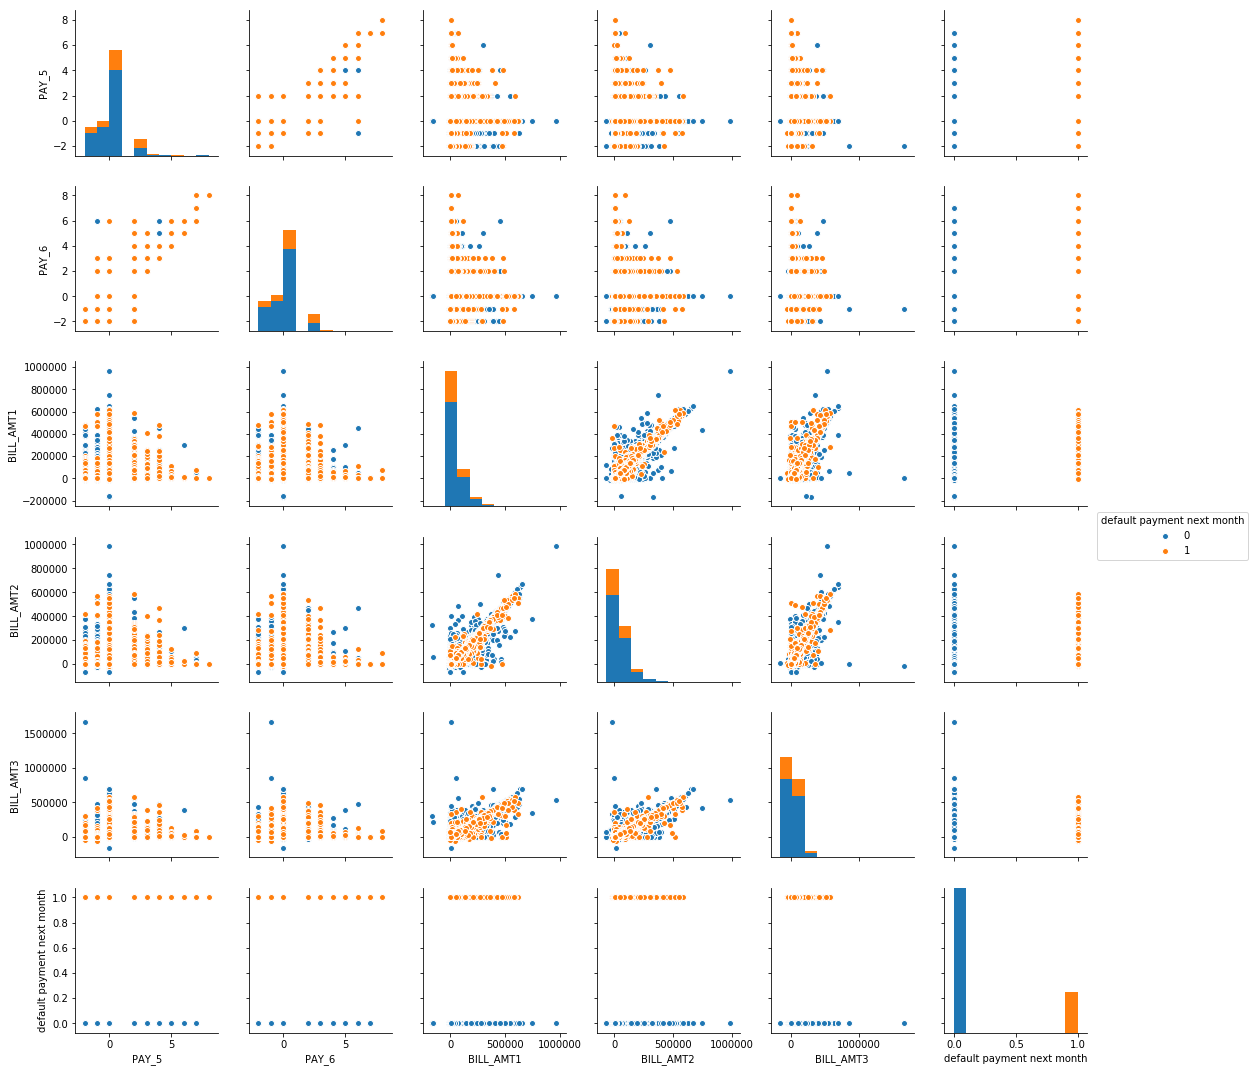

In [40]:
sb.pairplot(df3, hue='default payment next month')

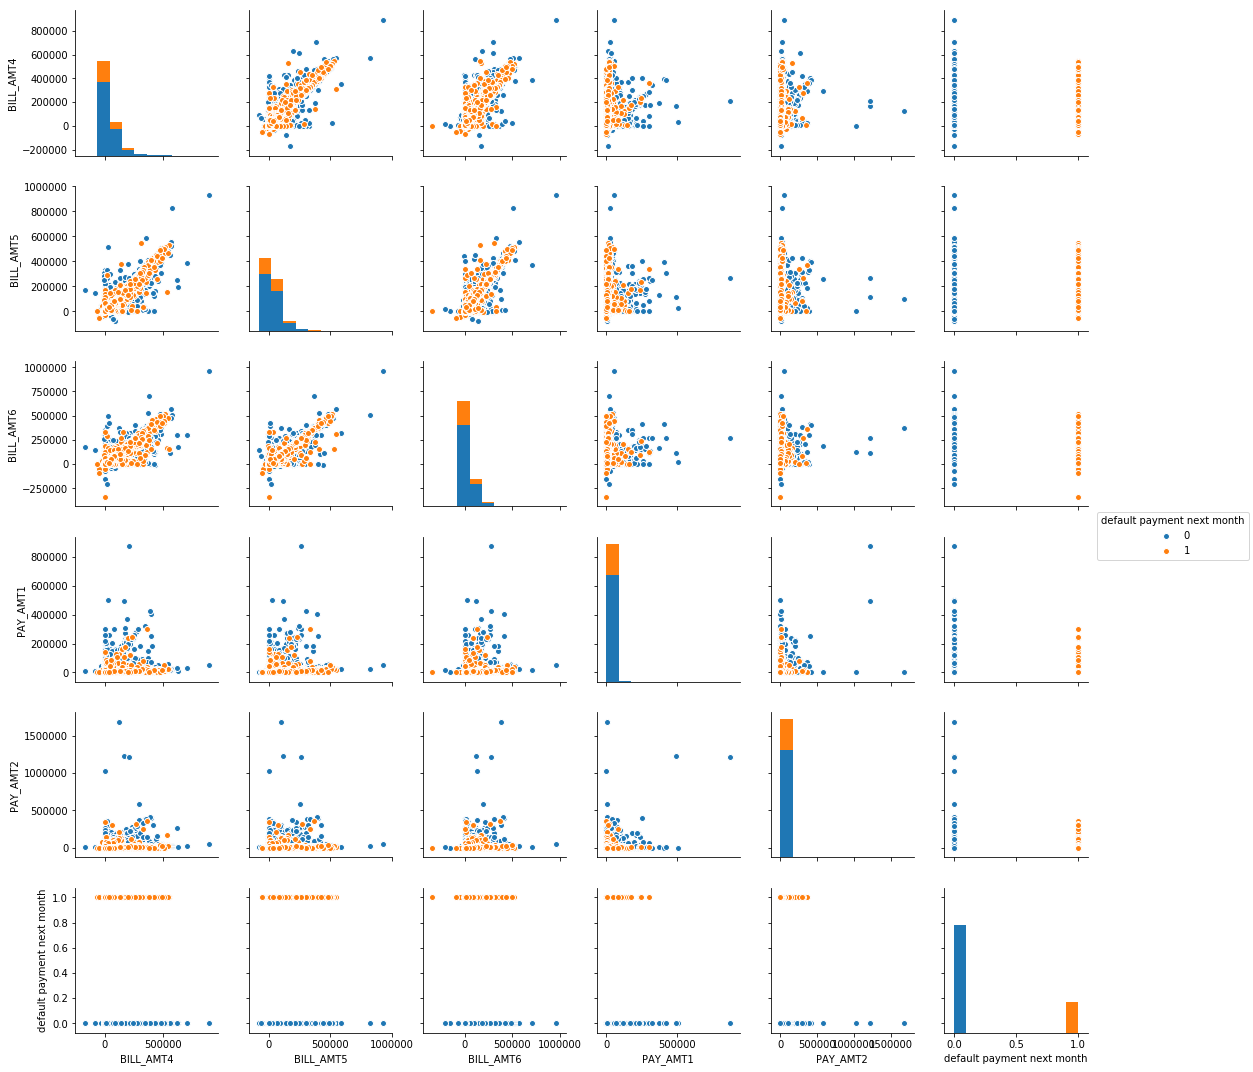

In [41]:
sb.pairplot(df4, hue='default payment next month')

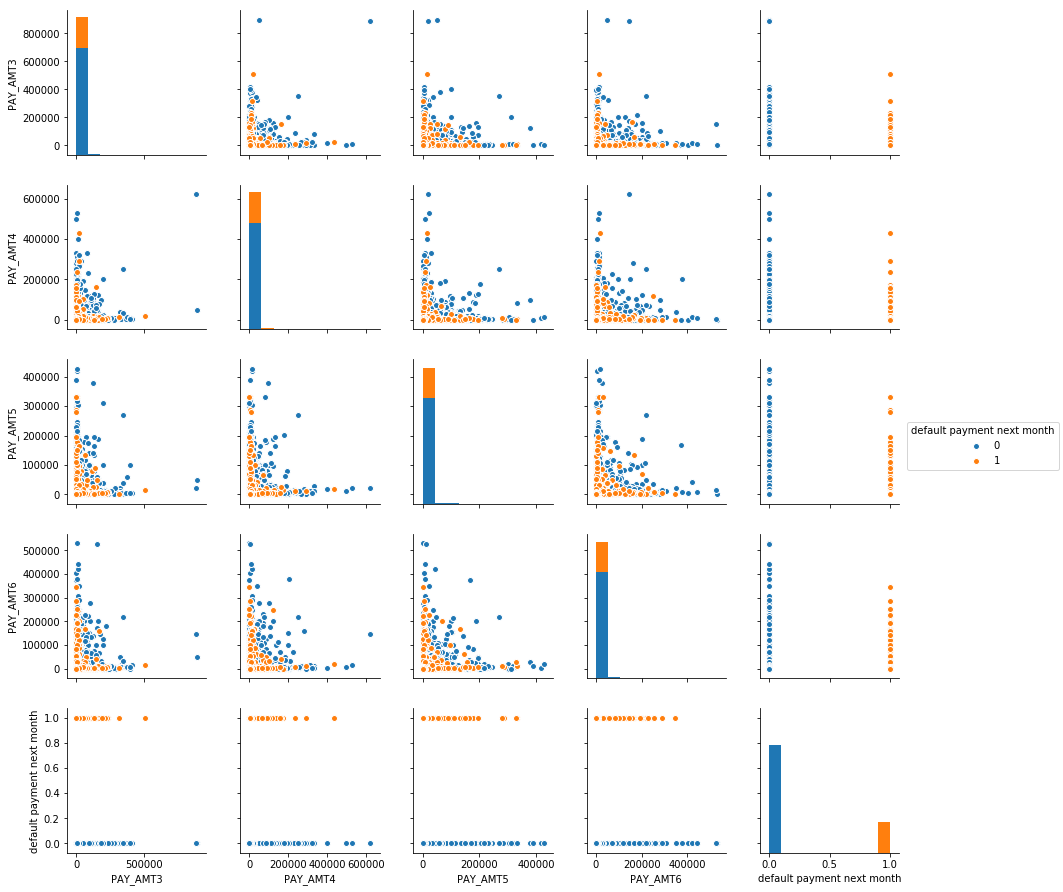

In [42]:
sb.pairplot(df5, hue='default payment next month')